# Main Library

In [1]:
# Reading Data & Visualization
import os
import random
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing & Training Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as k
from keras.layers import Dense, Dropout, Conv2D, Activation

# Loading Model
import pickle

## Reading Image

# Building Model ==> CNN Model & VGG 16

In [2]:
train_path = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\VGG16\train"
test_path = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\VGG16\test"

In [3]:
data_train = ImageDataGenerator(preprocessing_function=k.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)
data_test = ImageDataGenerator(preprocessing_function=k.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 25000 images belonging to 2 classes.
Found 1932 images belonging to 2 classes.


### import model ==> VGG16

In [4]:
model_vgg = tf.keras.applications.vgg16.VGG16()

In [5]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
model = k.models.Sequential()
for layer in model_vgg.layers[:-1]:
    model.add(layer)
for layers in model.layers:
    layers.trainable = False

In [7]:
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [8]:
history = model.fit(data_train, epochs=1, validation_data=(data_test), validation_split=0.2)

2500/2500 [==============================] - 716s 283ms/step - loss: 0.1866 - accuracy: 0.9235 - val_loss: 0.1223 - val_accuracy: 0.9519


In [9]:
loss, accuracy = model.evaluate(data_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

194/194 [==============================] - 13s 67ms/step - loss: 0.1223 - accuracy: 0.9519
The Accuracy Testing Data is ==> 0.9518633484840393 %
The loss Testing Data is ==> 0.12226008623838425


## ==========================================================================
## ==========================================================================
## ==========================================================================
## ==========================================================================

## Download Model

In [10]:
pickle.dump(model, open("D:\Pycharm\model_pickle\Dogs&Cats_with_pretraining_mode.bin", "wb"))

INFO:tensorflow:Assets written to: ram://e5d3247d-28ed-4737-803a-6d2c30fdeb05/assets


INFO:tensorflow:Assets written to: ram://e5d3247d-28ed-4737-803a-6d2c30fdeb05/assets


## System Prediction

D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test\56.jpg
1/1 [==============================] - 0s 19ms/step
The Prediction is ==>  dog


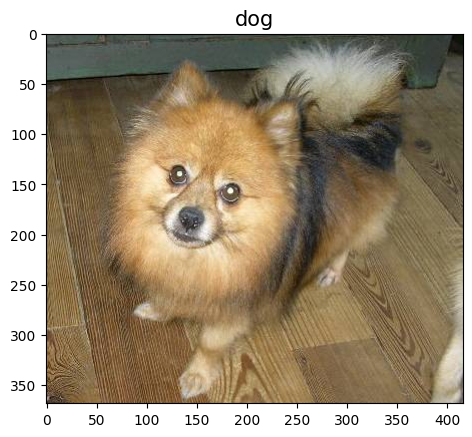

In [15]:
name_label = ["cat", "dog"]
path_img = input()
image = cv2.imread(path_img)
image_pre_new = cv2.resize(image, (224, 224))
image_pre_new = np.reshape(image_pre_new, [1, 224, 224, 3])
prediction = model.predict(image_pre_new)


# print(prediction)
new_prediction = name_label[np.argmax(prediction)]
print("The Prediction is ==> ", new_prediction)

# ================== Show image And Label Prediction =================================
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction, fontsize=15)
plt.show()

## Prediction Data

In [4]:
# test_list = os.listdir(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test")
# test_path = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test"

# image_test = []


# for image in test_list:
#     input_image = cv2.imread(test_path + "\\" + image)
#     input_image = cv2.resize(input_image, (224, 244))
#     image_test.append(input_image)
    
# data_test2 = np.array(image_test)
# data_test2 = data_test2.astype("float32")
# data_test2 = data_test2 / 255.0

In [38]:
model = pickle.load(open("D:\Pycharm\model_pickle\Dogs&Cats_with_pretraining_mode.bin", "rb"))

In [39]:
# test_list = os.listdir(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test")
# test_path = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test"

# prediction_image = []


# for image in test_list[0:5]:
#     input_image = cv2.imread(test_path + "\\" + image)
#     input_image = cv2.resize(input_image, (224, 244))
#     x = np.array(input_image).astype("float32")
#     x = x / 255.0
#     print(input_image.shape)
#     print(np.size(x))
    
# #     image_pre_new = np.reshape(input_image, [1, 224, 224, 3])
# #     prediction = model.predict(image_pre_new)
# #     prediction_image.append(prediction.argmax())

    
# # prediction_image = [pre.argmax() for pre in prediction_image]

In [ ]:
import pandas as pd
data = pd.DataFrame({"id": list(range(1, len(prediction)+1)),
                     "label": prediction})

In [ ]:
data.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\submation(VGG16)_data.csv", index=False)

## Computer Vision

In [41]:
name_label = ["Cat", "Dogs"]
model = pickle.load(open("D:\Pycharm\model_pickle\Dogs&Cats_with_pretraining_mode.bin", "rb"))
video = cv2.VideoCapture(0)

face_detection = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

while True:
    _, imagenn = video.read()

    face = face_detection.detectMultiScale(imagenn)

    for (x, y, w, h) in face:
        face_only = imagenn[y:y + h, x:x + w]
        cv2.rectangle(imagenn, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(imagenn, "Face", (x, y), 1, 1.3, (0, 0, 255), 2)

        image_pre_new = cv2.resize(face_only, (224, 224))
        image_pre_new = np.reshape(image_pre_new, [1, 224, 224, 3])
        prediction = model.predict(image_pre_new)

        print(prediction)
        new_prediction = name_label[np.argmax(prediction)]
        print("The Prediction is ==> ", new_prediction)



    cv2.imshow("image", imagenn)

    if cv2.waitKey(1) & 0xff == ord("o"):
        break

video.release()
cv2.destroyAllWindows()